### Where to Start with Machine Learning and Deep Learning? (Cont'df)

Let's have a look at a basic **multi-layer** program (adapted from:https://github.com/pkmital/CADL/blob/master/session-2/lecture-2.ipynb), and see if we can get a little creative with it.



In [1]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()
import tensorflow as tf
import tensorflow.contrib.layers as tfl
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jonathan.she

In [2]:
# Parameters 
learning_rate = 0.05
training_epochs = 1000 #how many cycles of training
display_step = 50

You can compare this 'toy' model with Google's widget here: https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise

What is essential to notice is how the cost updates the **weight** and **bias** of our predicted output for Y. This allows our program to "fit" the data by charting a line through the central relationship between X and Y samples.

While our model is able to fit a straight line through linear data, it is quite limited. A straight line can only separate very linear data. What if our data is non-linear (e.g. curved) or if has significant outliers (extreme values)? A linear cost function won't work - Let's see if we can fit a quadratic cost function to such a data collection. 

### Network Layers and Nonlinear Activation Functions

Our model above has a major problem: the polynomial function we used for **regression** (our Y_pred prediction of the true Y given X) is not able to **generalize** well (meaning it cannot fit a wide variety of data ranges and features). While we could certainly find better machine learning algorithms than this poor polynomial regression or condition the data so it can fit, let's jump on the deep learning bandwagon and see how it can approach this problem. 

Deep learning has found that adding "layers" and **"activation"** functions can help models better fit more generalized data. You can think of layers as multiple levels of a process - for example instead of one instance of Y_pred = WX + b, we could do it several times in a chain, like: ```L1 = WX + b, and L2 = W*L1 + b and Y_pred = W*L2 + b```. So we pass the result of each layer to the next layer. And we can transform dimensions during this process too. It can get very technical, so we'll just focus on coding it and seeing it in action.

And for the so-called activation functions, you can think of these as functions that give a certain shape to a range of numbers. These activation functions are generally **nonlinear**, and common examples are tanh, sigmoid and relu. See below

Here instead of feeding our training examples 1 by 1, we are going to feed them by **batches**. Batches are groups of samples, and this has some benefits. First, they can be more computationally efficient (on GPUs) by grouping array operations. Second, if we randomize the examples in the batches, we can help ensure that our model is not learning *based on the repeating order of training examples*, as this could greatly distort the performance capabilities of the model in a real setting.

In [3]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        cost = tf.reduce_mean(tf.abs(Y_pred - Y))
        optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

        # We now run a loop over epochs
        for it_i in range(n_iterations):
            # scrambles the order of data so the model can't learn what comes next
            idxs = np.random.permutation(range(len(train_X)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: train_X[idxs_i], Y: train_Y[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})

            if it_i % 50 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: train_X}, session=sess)
                fig, ax = plt.subplots(1, 1)
                ax.scatter(train_X, train_Y, alpha=0.99, c='r')
                ax.set_xlim([0, 1])
                ax.set_ylim([0, 1])
                ax.plot(train_X, ys_pred, 'k', alpha=it_i / n_iterations, lw=4)
                print(training_cost, "interation %d" % (it_i))
                fig.show()
                plt.draw()
                plt.show()
    


In [4]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        if activation is None:
            h = tf.matmul(X, W) + b
        if activation is "tanh":
            h = tf.nn.tanh(tf.matmul(X, W) + b, name='tanh')
        if activation is "sigmoid":
            h = tf.nn.sigmoid(tf.matmul(X, W) + b, name='sigmoid')
        if activation is "relu":
            h = tf.nn.relu(tf.matmul(X, W) + b, name='relu')
        print(tf.shape(h))
        return h

Let's see a single layer with the relu activation function, in which we input 1-node and output 10.

/Users/jonathan.sherman/anaconda3/envs/tf36/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  This is separate from the ipykernel package so we can avoid doing imports until


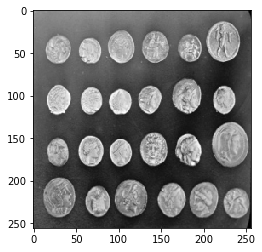

In [5]:
from skimage.data import coins
from scipy.misc import imresize
img = imresize(coins(), (256, 256))
plt.imshow(img, cmap='gray')
plt.show()

In [6]:

# We'll first collect all the positions in the image in our list, xs# We'll  
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# add dim for ys (so tf treats it as matrix)

ys = np.expand_dims(ys, axis=1)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((65536, 2), (65536, 1))

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')


n_neurons  = [2, 256, 128, 64, 32, 64, 128, 256, 1]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation="relu" if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

Tensor("layer_1/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_2/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_3/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_4/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_5/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_6/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_7/Shape:0", shape=(2,), dtype=int32)
Tensor("layer_8/Shape:0", shape=(2,), dtype=int32)


0 36.312828
1 35.11612
2 31.610676
3 24.251682
4 23.222595
5 21.820524
6 19.893293
7 18.554182
8 21.92059
9 17.987854
10 17.237055
11 16.958416
12 18.163424
13 17.417847
14 16.881851
15 15.726919
16 14.562202
17 14.300998
18 14.847464
19 15.501224


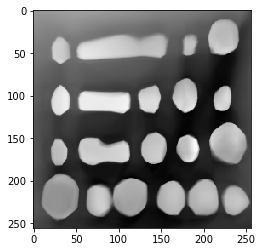

20 14.207708
21 12.471474
22 12.919898
23 12.901658
24 13.528033
25 13.942581
26 11.418616
27 12.151279
28 12.727321
29 12.972344
30 12.699097
31 11.231703
32 12.352647
33 11.827949
34 10.316708
35 12.513314
36 12.622573
37 11.901527
38 11.998015
39 11.684494


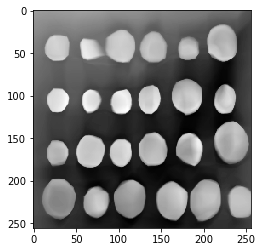

40 11.212654
41 11.122107
42 11.414764
43 11.021875
44 12.177669
45 9.793348
46 11.407754
47 11.227808
48 11.522226
49 10.152858
50 11.458527
51 10.487452
52 9.599379
53 10.997972
54 10.006769
55 9.337561
56 10.078159
57 10.590383
58 10.05154
59 10.86443


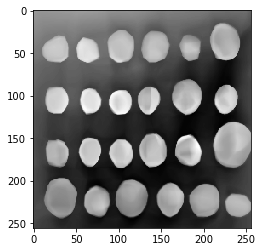

60 9.451364
61 10.815543
62 10.004865
63 9.519831
64 9.860373
65 10.442314
66 9.837866
67 9.789367
68 11.237131
69 9.626463
70 9.98741
71 10.557608
72 9.587893
73 10.585075
74 9.872701
75 9.660852
76 9.961988
77 10.407665
78 9.739784
79 8.988933


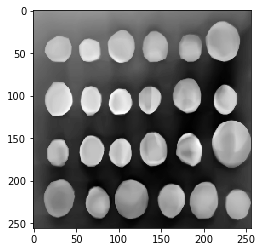

80 8.921516
81 10.26877
82 9.493077
83 9.093453
84 9.321587
85 9.52921
86 9.170774
87 8.815458
88 8.530401
89 9.58746
90 9.518392
91 8.915428
92 8.6044655
93 9.349174
94 8.580495
95 8.76036
96 9.977703
97 8.788113
98 9.071745
99 9.518686


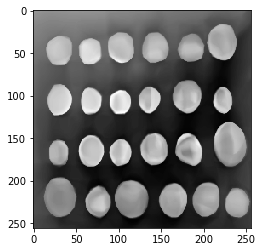

100 8.803246
101 9.15961
102 9.365601
103 9.6549
104 8.228024
105 9.087661
106 9.697709
107 9.526783
108 9.021887
109 8.617075
110 8.512513
111 8.533588
112 8.853046
113 8.801477
114 8.798967
115 8.626944
116 8.145573
117 8.611361
118 8.421183
119 8.542247


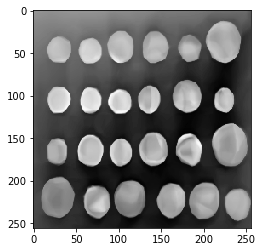

120 8.243015
121 8.724177
122 8.144985
123 8.568863
124 8.6326275
125 8.409917
126 8.794253
127 8.58046
128 8.440885
129 8.268267
130 8.475886
131 8.712585
132 8.100136
133 8.16115
134 8.4812565
135 8.336135
136 8.7919655
137 8.15375
138 8.623955
139 9.1615715


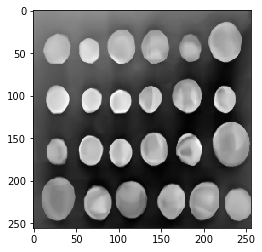

140 8.234588
141 9.192667
142 8.6742325
143 8.80241
144 8.568687
145 8.447672
146 8.3375435
147 8.164655
148 8.438153
149 8.823729
150 8.612704
151 8.011948
152 8.427645
153 8.316823
154 7.7752433
155 9.10556
156 7.8632827
157 8.066284
158 7.859184
159 7.9544916


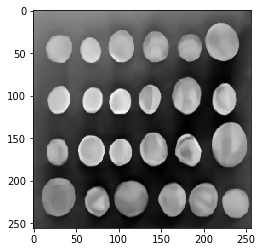

160 9.115391
161 8.439334
162 7.750812
163 7.961581
164 7.57477
165 7.57077
166 8.344563
167 7.9485064
168 8.661179
169 7.87902
170 7.993642
171 7.616787
172 8.268068
173 7.9427023
174 8.414871
175 8.040377
176 8.1414585
177 8.097314
178 7.901909
179 8.102834


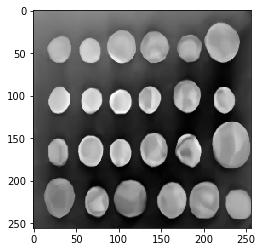

180 7.587103
181 8.020584
182 8.028263
183 7.6352677
184 7.5159388
185 7.253359
186 7.6782236
187 8.11798
188 8.085423
189 8.824863
190 7.7856407
191 7.668159
192 8.675152
193 8.303932
194 8.372712
195 7.9457793
196 7.730954
197 8.149637
198 7.8620386
199 7.771284


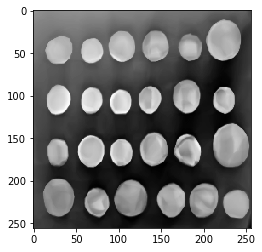

200 7.197747
201 7.4225483
202 7.9294524
203 7.080117
204 7.494263
205 7.07061
206 7.4619007
207 7.4402184
208 7.6543097
209 7.3778334
210 7.319266
211 7.3983946
212 6.9838076
213 7.4987946
214 8.058748
215 7.531035
216 8.05625
217 7.521365
218 6.9832573
219 7.381654


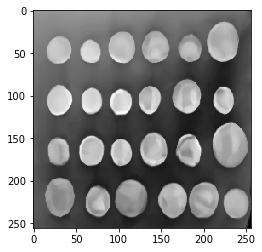

220 7.355175
221 7.002767
222 7.3219175
223 7.39181
224 7.2530713
225 7.646655
226 7.476918
227 7.8719573
228 7.7792034
229 7.5431376
230 7.0581355
231 7.3552046
232 7.913331
233 7.1768236
234 7.586563
235 7.4648023
236 6.9081664
237 7.9131403
238 6.9766126
239 7.5373726


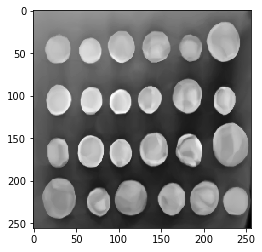

240 7.8602247
241 6.9459076
242 6.8592224
243 7.1362276
244 7.98651
245 6.9838424
246 7.501164
247 7.116167
248 7.3374553
249 7.8721848
250 6.7541113
251 7.63492
252 7.6954656
253 7.293391
254 7.425629
255 7.213945
256 7.257032
257 7.377361
258 7.7325625


KeyboardInterrupt: 

In [8]:
cost = tf.reduce_mean(
    tf.reduce_sum(tf.abs(Y_pred - Y), 1))
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img, cmap='gray')
            plt.show()

We can also try to predict the normal (aka Gaussian) distribution instead of grayscale/rgb values. To do so we'll need to compute the means and standard deviation of our linear regression. This is called a **mixture density model**, or MDN. It's a bit ahead of where we need to be at this moment learning-wise, but perhaps the performance comparison is interesting. Note what we are doing is computing the density of Y given X (out of a possible total of 1. if all Y occured at a given X) and using this as our **cost function** instead of taking the mean of the absolute difference

In [ ]:
tf.reset_default_graph()

xs = []
ys = []
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        xs.append([row_i, col_i])
        ys.append(img[row_i, col_i])

xs = np.array(xs)
ys = np.array(ys)

xs = (xs - np.mean(xs)) / np.std(xs)
ys = (ys / 255.0)

# add dim for ys (so tf treats it as matrix)
ys = np.expand_dims(ys, axis=1)

In [ ]:
# probability density function
# Note: not sure if below or sigma out of sqrt is right
def gausspdf(x, mean, sigma):
    return tf.exp(-(x - mean)**2 /
                  (2 * sigma**2)) / (tf.sqrt(2.0 * np.pi * sigma))

#def gausspdf(x, mean, sigma):
#    dist = tf.contrib.distributions.Normal(mean, sigma) 
#    return dist.prob(x)

def build_single_gaussian_model(n_input_features=2,
                                n_output_features=1,
                                n_neurons =[64, 28, 28, 14, 18, 54]):

    
    X = tf.placeholder(tf.float32, shape=[None, n_input_features], name='X')
    Y = tf.placeholder(tf.float32, shape=[None, n_output_features], name='Y')
    
    current_input = X
    for layer_i in range(1, len(n_neurons)):
        current_input = tfl.linear(
            inputs=current_input,
            num_outputs=n_neurons[layer_i],
            activation_fn=tf.nn.tanh if (layer_i+1) < len(n_neurons) else tf.nn.sigmoid,
            scope='layer_' + str(layer_i))
    means = tfl.linear(
        inputs=current_input,
        num_outputs=n_output_features,
        activation_fn=None,
        scope='means')
    sigmas = tf.maximum(
        tfl.linear(
            inputs=current_input,
            num_outputs=n_output_features,
            activation_fn=tf.nn.relu,
            scope='sigmas'), 1e-8)

    p = gausspdf(Y, means, sigmas)
    negloglike = -tf.log(tf.maximum(p, 1e-8))
    cost = tf.reduce_mean(tf.reduce_sum(negloglike, 1))
    #cost = tf.reduce_mean(tf.reduce_mean(negloglike, 1))
    return X, Y, cost, means

In [ ]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    img_d = img
    X, Y, cost, means = build_single_gaussian_model()
    optimizer = tf.train.AdamOptimizer(0.005).minimize(cost)
    init_op = tf.global_variables_initializer()
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(init_op)
    # We now run a loop over epochs
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size:(batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})
        this_cost = sess.run([cost], feed_dict={X: xs, Y: ys})
        print('cost:', this_cost)
        if (it_i + 1) % 20 == 0:
            ys_pred = means.eval(feed_dict={X: xs}, session=sess)
            #img = np.clip(ys_pred.reshape(img.shape), 0, 1)
            img_d = ys_pred.reshape(img_d.shape)
            img_d = img_d/np.amax(img_d)
            plt.imshow(img_d, cmap='gray')
            plt.show()